### ИУ5-61Б Павловская А.А. 
## Курсовая работа по дисциплине "Технологии машинного обучения"

### Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных мы будем использовать набор данных 
Life Expectancy (WHO) - https://www.kaggle.com/kumarajarshi/life-expectancy-who

Набор данных предназначен для статистического анализа факторов, влияющих на ожидаемую продолжительность жизни.

Датасет состоит из одного файла:
- Life Expectancy Data.csv 

Файл содержит следующие колонки:
- Country - страна
- Year - год
- Status - статус страны "развитая" или "развивающаяся"
- Life_expectancy - ожидаемая продолжительность жизни (возраст)
- Adult_Mortality - показатели смертности взрослого населения обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 населения)   
- infant_deaths - число младенческих смертей на 1000 населения
- Alcohol - алкоголь, зарегистрированное потребление на душу населения (15+) (в литрах чистого алкоголя) 
- percentage_expenditure - расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения(%)
- Hepatitis_B - охват иммунизацией против гепатита В (HepB) среди детей в возрасте 1 года (%)
- Measles - корь - количество зарегистрированных случаев заболевания на 1000 человек населения    
- BMI - средний индекс массы тела всего населения
- under-five_deaths - число смертей в возрасте до пяти лет на 1000 человек населения
- Polio - охват иммунизацией против полиомиелита (Pol3) среди детей в возрасте 1 года (%)            
- Total_expenditure - общие государственные расходы на здравоохранение в процентах от общего объема государственных расходов (%)
- Diphtheria - охват иммунизацией против столбняка дифтерии и коклюша (DTP3) среди детей в возрасте 1 года (%)      
- HIV/AIDS - смертность на 1 000 живорождений ВИЧ/СПИД (0-4 года)           
- GDP - валовой внутренний продукт на душу населения (в долларах США)            
- Population - население страны           
- thinness_1-19_years - распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (%)    
- thinness_5-9_years - распространенность худобы среди детей в возрасте от 5 до 9 лет(%)       
- Income_composition_of_resources - индекс человеческого развития с точки зрения структуры доходов от ресурсов (индекс в диапазоне от 0 до 1)
- Schooling - количество лет обучения в школе(лет)                       

В данной работе будет решаться задача регрессии. В качестве целевого признака будет использован признак "Life_expectancy".

### Импорт библиотек

In [137]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

In [138]:
data = pd.read_csv('data/Life Expectancy Data.csv')

In [139]:
# Удаление дубликатов записей, если они присутствуют
data.drop_duplicates()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Кодирование категориальных признаков.  Анализ и заполнение пропусков в данных.

### Основные характеристики датасета

In [140]:
# Первые пять строк
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [141]:
# Список колонок
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [142]:
# Список колонок с типами данных
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness_1-19_years                float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [143]:
data.shape

(2938, 22)

In [144]:
# Кодирование категориальных признаков целочисленными значениями
le = LabelEncoder()
le.fit(data.Status) 
data.Status = le.transform(data.Status)
le.fit(data.Country) 
data.Country = le.transform(data.Country)

In [145]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [146]:
data.dtypes

Country                              int32
Year                                 int64
Status                               int32
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness_1-19_years                float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [147]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Country - 0
Year - 0
Status - 0
Life_expectancy - 10
Adult_Mortality - 10
infant_deaths - 0
Alcohol - 194
percentage_expenditure - 0
Hepatitis_B - 553
Measles - 0
BMI - 34
under-five_deaths - 0
Polio - 19
Total_expenditure - 226
Diphtheria - 19
HIV/AIDS - 0
GDP - 448
Population - 652
thinness_1-19_years - 34
thinness_5-9_years - 34
Income_composition_of_resources - 167
Schooling - 163


In [148]:
# Выбор числовых колонок с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Life_expectancy. Тип данных float64. Количество пустых значений 10, 0.34%.
Колонка Adult_Mortality. Тип данных float64. Количество пустых значений 10, 0.34%.
Колонка Alcohol. Тип данных float64. Количество пустых значений 194, 6.6%.
Колонка Hepatitis_B. Тип данных float64. Количество пустых значений 553, 18.82%.
Колонка BMI. Тип данных float64. Количество пустых значений 34, 1.16%.
Колонка Polio. Тип данных float64. Количество пустых значений 19, 0.65%.
Колонка Total_expenditure. Тип данных float64. Количество пустых значений 226, 7.69%.
Колонка Diphtheria. Тип данных float64. Количество пустых значений 19, 0.65%.
Колонка GDP. Тип данных float64. Количество пустых значений 448, 15.25%.
Колонка Population. Тип данных float64. Количество пустых значений 652, 22.19%.
Колонка thinness_1-19_years. Тип данных float64. Количество пустых значений 34, 1.16%.
Колонка thinness_5-9_years. Тип данных float64. Количество пустых значений 34, 1.16%.
Колонка Income_composition_of_resources. Тип

In [149]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]

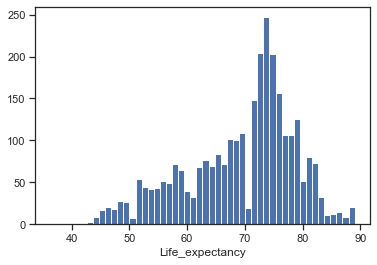

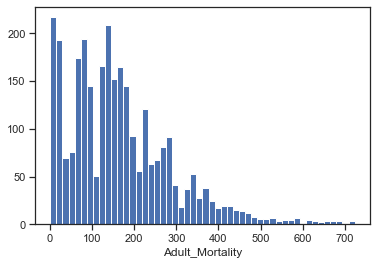

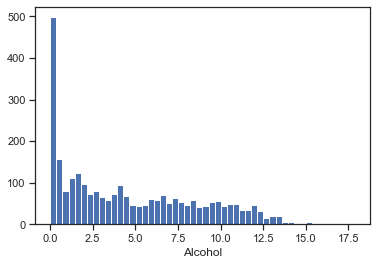

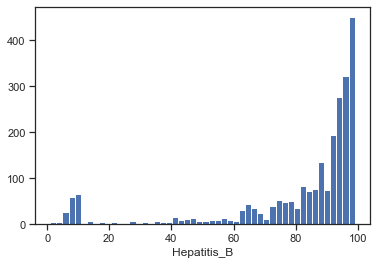

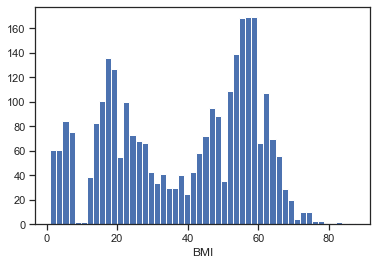

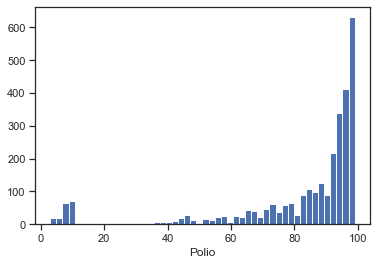

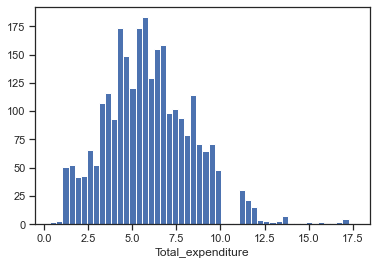

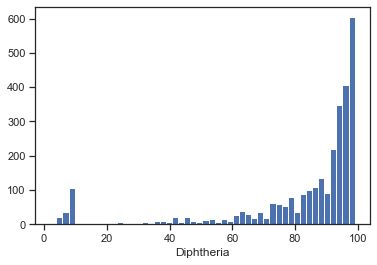

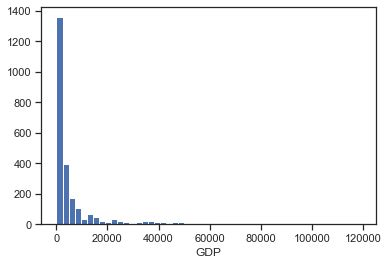

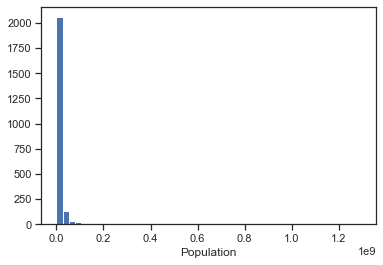

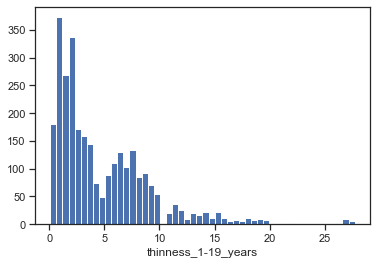

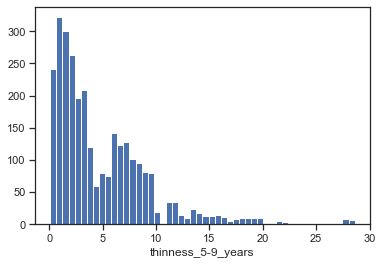

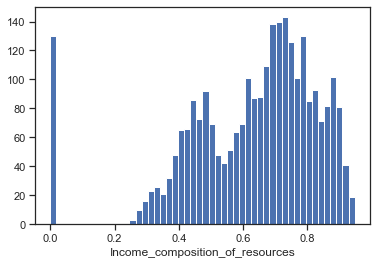

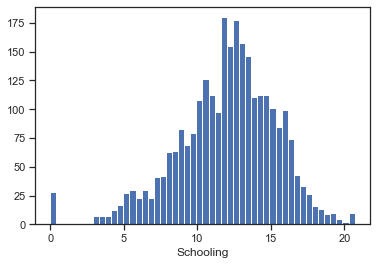

In [150]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [151]:
# Удаление колонок со слишком большим количеством пропусков
data.drop(['Hepatitis_B','GDP','Population',], axis = 1, inplace = True)

In [152]:
# Обработка пропусков 
imp_num = SimpleImputer(strategy='median')
imp_num2 = SimpleImputer(strategy='most_frequent')
data[['Life_expectancy']] = imp_num2.fit_transform(data[['Life_expectancy']])
data[['Adult_Mortality']] = imp_num.fit_transform(data[['Adult_Mortality']])
data[['Alcohol']] = imp_num.fit_transform(data[['Alcohol']])
data[['BMI']] = imp_num.fit_transform(data[['BMI']])
data[['Polio']] = imp_num.fit_transform(data[['Polio']])
data[['Total_expenditure']] = imp_num2.fit_transform(data[['Total_expenditure']])
data[['Diphtheria']] = imp_num.fit_transform(data[['Diphtheria']])
data[['thinness_1-19_years']] = imp_num.fit_transform(data[['thinness_1-19_years']])
data[['thinness_5-9_years']] = imp_num.fit_transform(data[['thinness_5-9_years']])
data[['Income_composition_of_resources']] = imp_num.fit_transform(data[['Income_composition_of_resources']])
data[['Schooling']] = imp_num2.fit_transform(data[['Schooling']])

In [153]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Country - 0
Year - 0
Status - 0
Life_expectancy - 0
Adult_Mortality - 0
infant_deaths - 0
Alcohol - 0
percentage_expenditure - 0
Measles - 0
BMI - 0
under-five_deaths - 0
Polio - 0
Total_expenditure - 0
Diphtheria - 0
HIV/AIDS - 0
thinness_1-19_years - 0
thinness_5-9_years - 0
Income_composition_of_resources - 0
Schooling - 0


Все пропуски в данных заполнены.

### Выбор признаков, подходящих для построения моделей. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [154]:
# Числовые колонки для масштабирования
scale_cols = ['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'percentage_expenditure', 'Measles',
              'BMI','under-five_deaths','Polio','Total_expenditure','Diphtheria','thinness_1-19_years',
             'thinness_5-9_years','Schooling']

In [155]:
# Масштабирование данных
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [156]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [157]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Measles,BMI,...,percentage_expenditure_scaled,Measles_scaled,BMI_scaled,under-five_deaths_scaled,Polio_scaled,Total_expenditure_scaled,Diphtheria_scaled,thinness_1-19_years_scaled,thinness_5-9_years_scaled,Schooling_scaled
0,0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,...,0.003659,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.619565,0.603509,0.487923
1,0,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,...,0.003774,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.630435,0.610526,0.483092
2,0,2013,1,59.9,268.0,66,0.01,73.219243,430,18.1,...,0.003759,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.637681,0.617544,0.478261
3,0,2012,1,59.5,272.0,69,0.01,78.184215,2787,17.6,...,0.004014,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.644928,0.628070,0.473430
4,0,2011,1,59.2,275.0,71,0.01,7.097109,3013,17.2,...,0.000364,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.655797,0.635088,0.458937


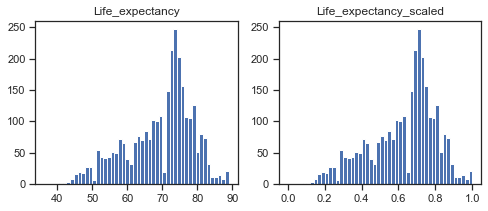

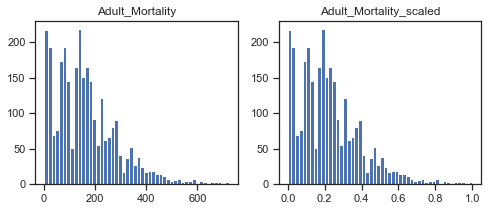

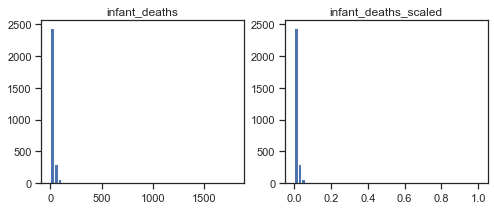

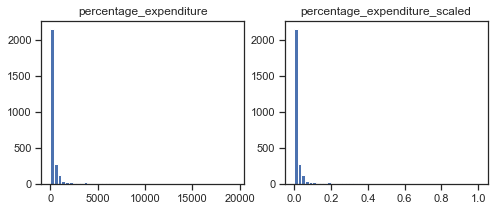

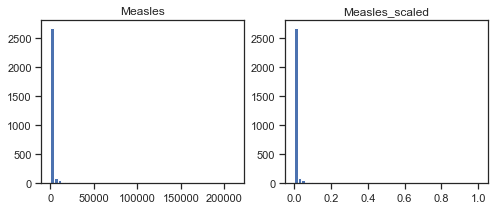

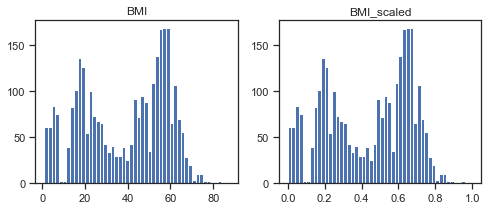

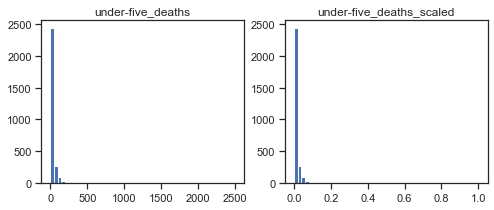

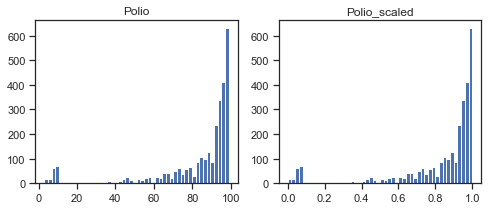

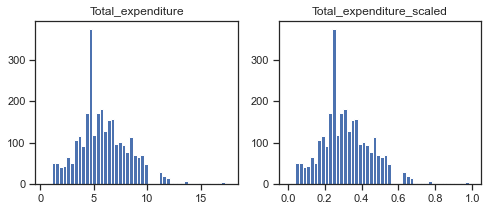

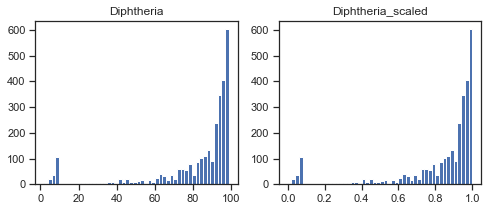

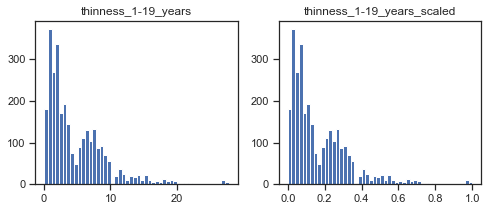

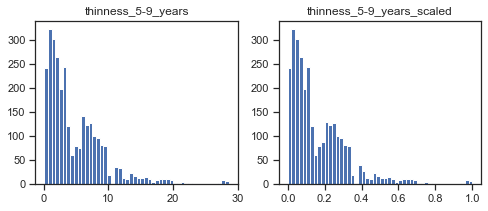

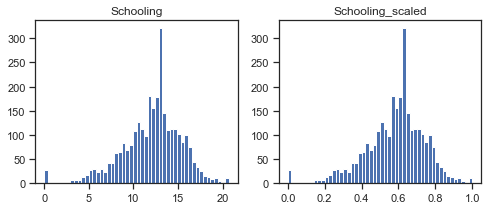

In [158]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [159]:
corr_cols_1 = scale_cols 
corr_cols_1

['Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'percentage_expenditure',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'thinness_1-19_years',
 'thinness_5-9_years',
 'Schooling']

In [160]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix 
corr_cols_2

['Life_expectancy_scaled',
 'Adult_Mortality_scaled',
 'infant_deaths_scaled',
 'percentage_expenditure_scaled',
 'Measles_scaled',
 'BMI_scaled',
 'under-five_deaths_scaled',
 'Polio_scaled',
 'Total_expenditure_scaled',
 'Diphtheria_scaled',
 'thinness_1-19_years_scaled',
 'thinness_5-9_years_scaled',
 'Schooling_scaled']

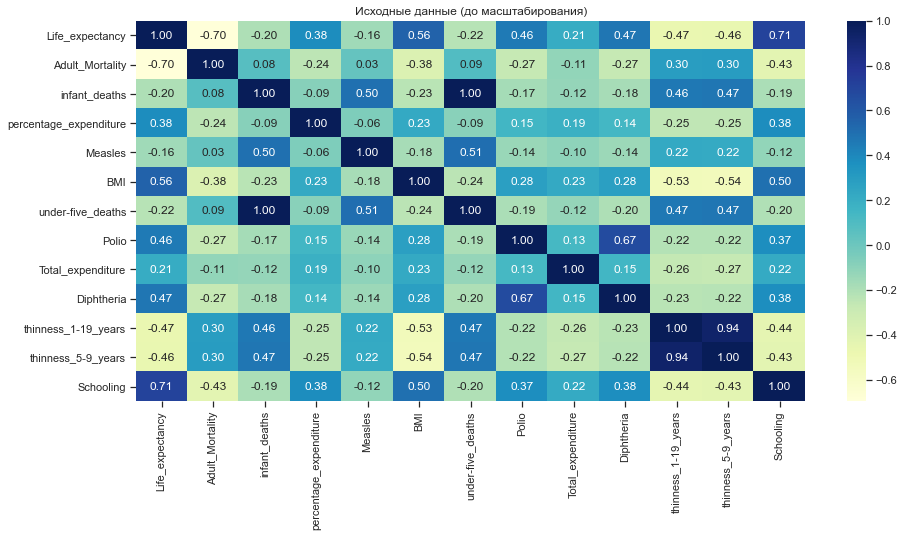

In [161]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data[corr_cols_1].corr(),cmap='YlGnBu', annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

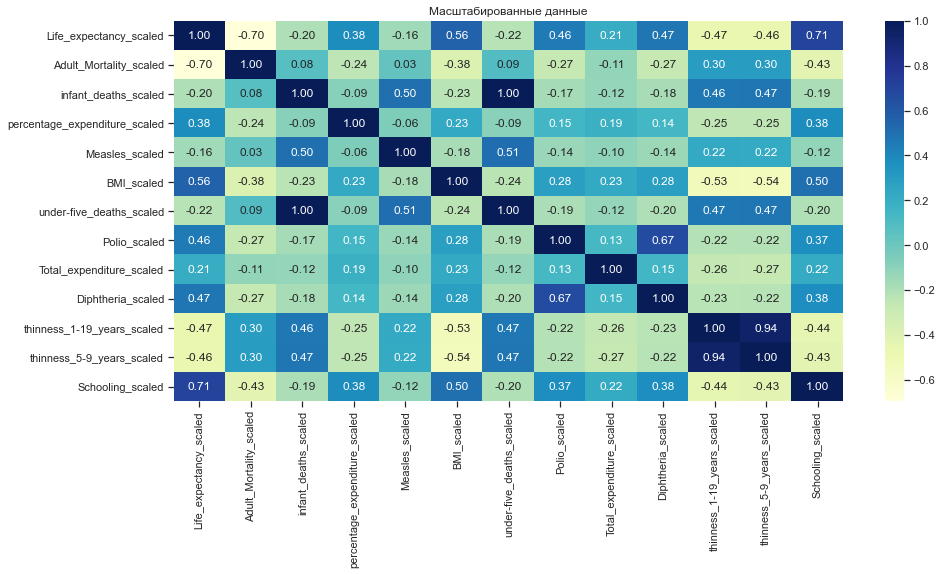

In [162]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data[corr_cols_2].corr(),cmap='YlGnBu', annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак регрессии "Life_expectancy" наиболее сильно коррелирует с "Schooled" (0.71) и "BMI"(0.56). Эти признаки обязательно следует оставить в модели регрессии.
- Пары признаков "thinness_1-19_years" и "thinness_5-9_years", "under-five_deaths" и "infant_deaths" имеют корреляцию, близкую по модулю к 1, поэтому одновременно оба признака в одной паре не следуют включать в модели.
- Для построения моделей будем использовать признаки "percentage_expenditure" ,"BMI", "Diphtheria","Polio","Total_expenditure", "Schooling" по причине достаточно большой корреляции с целевым признаком.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

### Построение графиков для понимания структуры данных

In [163]:
data_show = data[['Life_expectancy_scaled','percentage_expenditure_scaled','BMI_scaled','Diphtheria_scaled',
              'Polio_scaled', 'Total_expenditure_scaled','Schooling_scaled']]

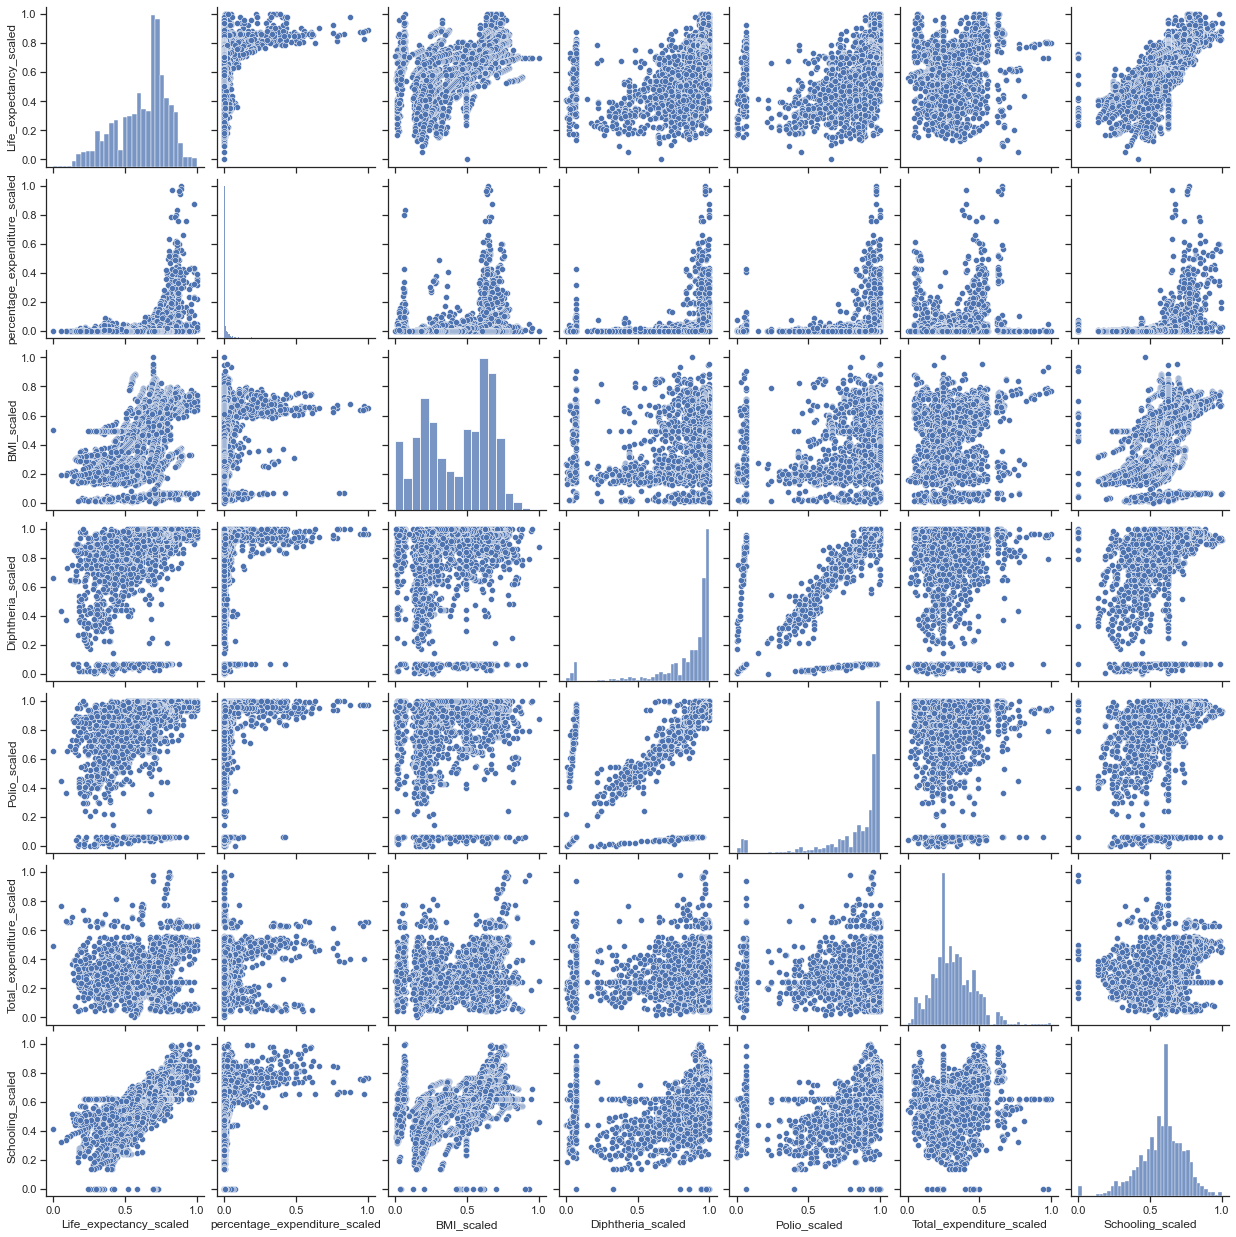

In [164]:
# Парные диаграммы
sns.pairplot(data_show)

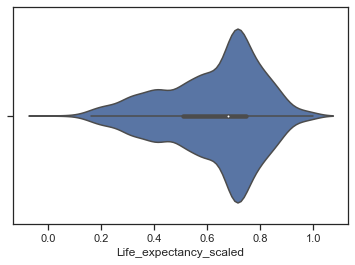

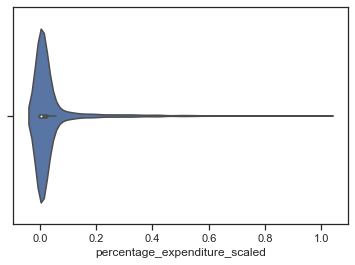

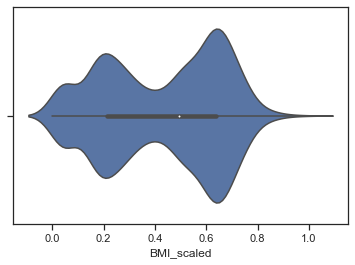

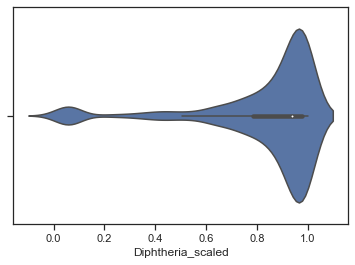

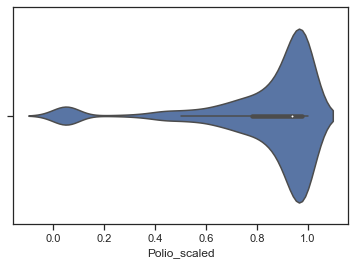

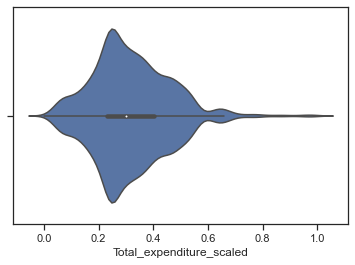

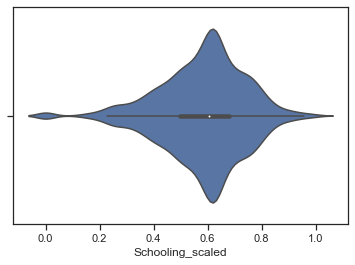

In [165]:
# Скрипичные диаграммы для числовых колонок
for col in data_show.columns:
    sns.violinplot(x=data_show[col])
    plt.show()

### Выбор метрик для последующей оценки качества моделей.

#### В качестве метрик для решения задачи регрессии будем использовать следующие метрики:

#### Mean absolute error - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции mean_absolute_error.

#### Mean squared error- средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции mean_squared_error.

#### Median absolute error

$MedAE(y,\hat{y})=median(|y_1−\hat{y_1}|,…,|y_N−\hat{y_N}|) $

Метрика интересна тем, что является устойчивой к выбросам в данных.

Вычисляется с помощью функции median_absolute_error.

#### Метрика $R^2$ или коэффициент детерминации

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции r2_score.

### Сохранение и визуализация метрик

Класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [329]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.003, a-0.003, str(round(b,3)), color='white')
        plt.show()   

### Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [330]:
# Признаки для задачи регресии
regr_cols = ['percentage_expenditure_scaled','BMI_scaled','Diphtheria_scaled',
              'Polio_scaled', 'Total_expenditure_scaled','Schooling_scaled']

In [331]:
X = data[regr_cols]
Y = data.Life_expectancy_scaled
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    percentage_expenditure_scaled  BMI_scaled  Diphtheria_scaled  Polio_scaled  \
0                       0.003659    0.209733           0.649485      0.031250   
1                       0.003774    0.203940           0.618557      0.572917   
2                       0.003759    0.198146           0.639175      0.614583   
3                       0.004014    0.192352           0.670103      0.666667   
4                       0.000364    0.187717           0.680412      0.677083   

   Total_expenditure_scaled  Schooling_scaled  
0                  0.452118          0.487923  
1                  0.453279          0.483092  
2                  0.450377          0.478261  
3                  0.473012          0.473430  
4                  0.435287          0.458937   

Выходные данные:

 0    0.544592
1    0.447818
2    0.447818
3    0.440228
4    0.434535
Name: Life_expectancy_scaled, dtype: float64


In [332]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       percentage_expenditure_scaled  BMI_scaled  Diphtheria_scaled  \
1059                       0.033754    0.566628           0.731959   
861                        0.000527    0.146002           0.989691   
847                        0.012053    0.209733           0.350515   
890                        0.001564    0.156431           0.030928   
485                        0.005180    0.289687           0.845361   

      Polio_scaled  Total_expenditure_scaled  Schooling_scaled  
1059      0.645833                  0.338363          0.516908  
861       0.989583                  0.160766          0.241546  
847       0.427083                  0.123622          0.396135  
890       0.604167                  0.250725          0.342995  
485       0.833333                  0.284968          0.468599   

Входные параметры тестовой выборки:

       percentage_expenditure_scaled  BMI_scaled  Diphtheria_scaled  \
867                        0.138608    0

In [333]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2644, 6), (294, 6), (2644,), (294,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [351]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=10),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [352]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [355]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    medae = median_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, MedAE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(medae, 3), round(r2, 3)))

In [356]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.079, MSE=0.011, MedAE=0.064, R2=0.667
KNN_5 	 MAE=0.061, MSE=0.007, MedAE=0.046, R2=0.781
SVR 	 MAE=0.07, MSE=0.008, MedAE=0.06, R2=0.755
Tree 	 MAE=0.073, MSE=0.011, MedAE=0.044, R2=0.641
RF 	 MAE=0.048, MSE=0.004, MedAE=0.036, R2=0.866
GB 	 MAE=0.064, MSE=0.007, MedAE=0.051, R2=0.785


### Подбор гиперпараметров для выбранных моделей.

In [357]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [358]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, Y_train)

Wall time: 880 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='neg_mean_squared_error')

In [359]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor()

In [360]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 5}

In [361]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'5'

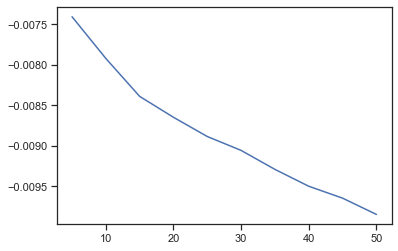

In [362]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

### Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [363]:
regr_models_grid = {'KNN_10':KNeighborsRegressor(n_neighbors=10), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [364]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_10 	 MAE=0.061, MSE=0.007, MedAE=0.046, R2=0.781
KNN_5 	 MAE=0.059, MSE=0.007, MedAE=0.047, R2=0.792


### Формирование выводов о качестве построенных моделей на основе выбранных метрик. 

In [365]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'MedAE', 'R2'], dtype=object)

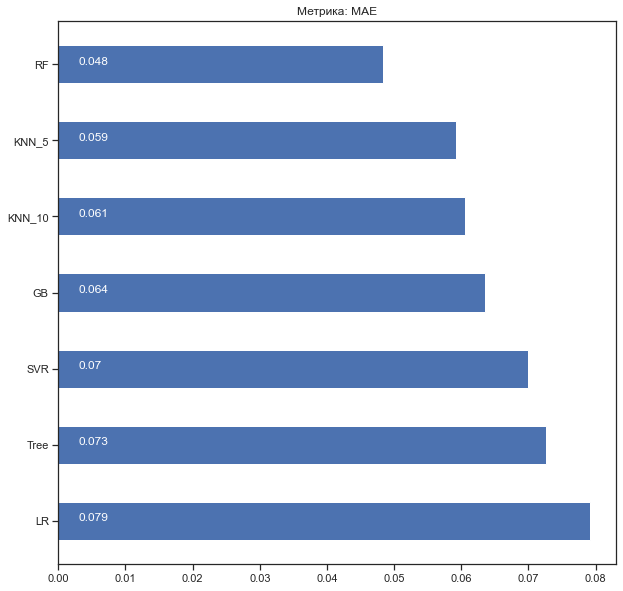

In [366]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(10, 10))

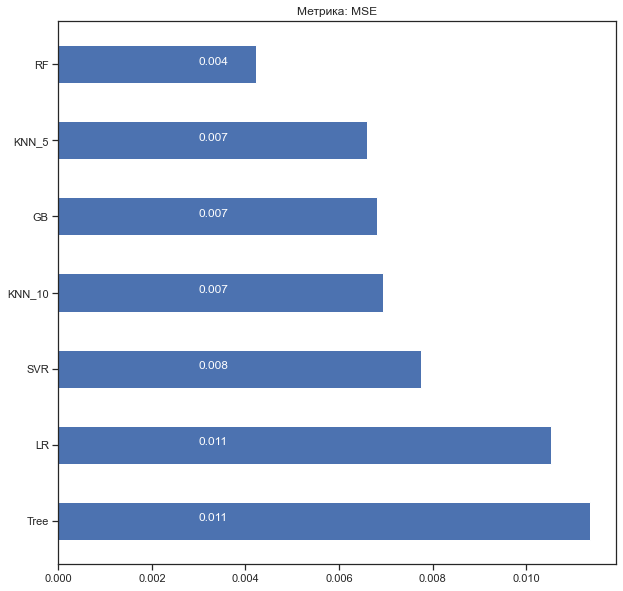

In [367]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(10,10))

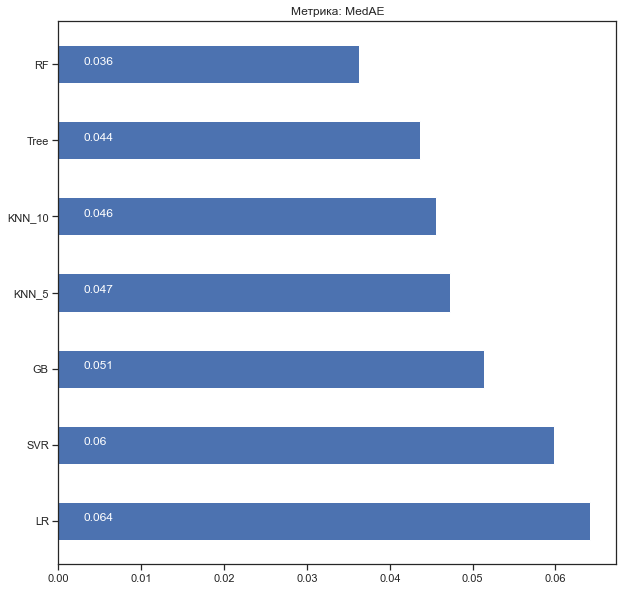

In [368]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', ascending=False, figsize=(10, 10))

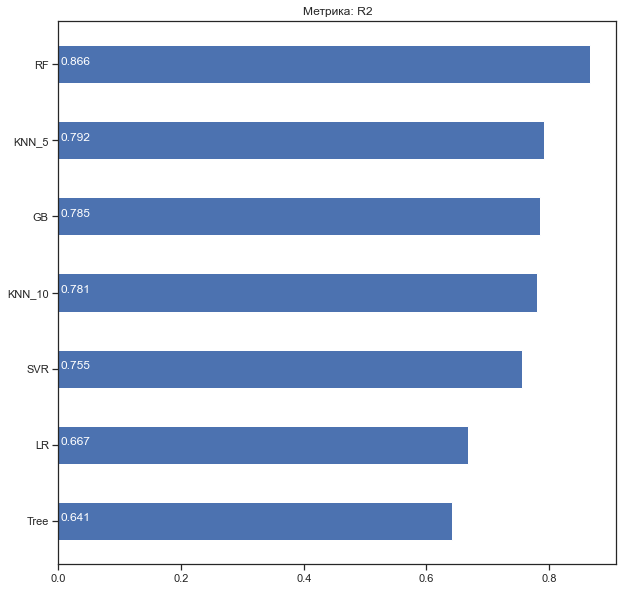

In [369]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(10, 10))

**Вывод: лучшей оказалась модель на основе случайного леса.**